In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

In [2]:
train_ds_files=tf.data.Dataset.list_files('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/*')

2022-09-04 00:21:34.364287: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
len(train_ds_files)

585

In [4]:
train_labels_ds=pd.read_csv('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv')
train_labels_ds.shape

(585, 2)

In [5]:
train_labels_ds.head()

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1


In [6]:
train_labels_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   BraTS21ID   585 non-null    int64
 1   MGMT_value  585 non-null    int64
dtypes: int64(2)
memory usage: 9.3 KB


In [7]:
train_labels_ds.describe()

,BraTS21ID,MGMT_value
count,585.000000,585.000000
mean,431.179487,0.524786
std,251.545000,0.499813
min,0.000000,0.000000
25%,219.000000,0.000000
50%,423.000000,1.000000
75%,630.000000,1.000000
max,1010.000000,1.000000


In [8]:
train_labels_ds['MGMT_value'].value_counts()

1    307
0    278
Name: MGMT_value, dtype: int64

In [9]:
train_labels_ds['BraTS21ID'].unique

<bound method Series.unique of 0         0
1         2
2         3
3         5
4         6
       ... 
580    1005
581    1007
582    1008
583    1009
584    1010
Name: BraTS21ID, Length: 585, dtype: int64>

In [10]:
train_ds_files_00000_FLAIR=tf.data.Dataset.list_files('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR/*')
filename=train_ds_files_00000_FLAIR.as_numpy_iterator().next()
print(filename)

b'../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR/Image-387.dcm'


In [11]:
def bytes_to_str(byte_filename):
    return str(byte_filename).split('\'')[1]

In [12]:
ds_flair_000=tf.data.Dataset.list_files('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000/FLAIR/*')
def best_image(ds_paths):
    
    s=0
    filep=''
    for filename in ds_paths.as_numpy_iterator():
        img=pydicom.dcmread(bytes_to_str(filename))
        sp=np.array(img.pixel_array).sum()
        if(sp>s):
            s=sp
            filep=bytes_to_str(filename)
    #best_img=pydicom.dcmread(filep)
    return filep
    

In [13]:
def image_selection(train_ds_files):
    files_num=[]
    best_flair_images=[]
    best_t1w_images=[]
    best_t1wce_images=[]
    best_t2w_images=[]
    for filename in train_ds_files.as_numpy_iterator():
        path=bytes_to_str(filename)
        FLAIR_PATH=path+'/FLAIR/*'
        T1w_PATH=path+'/T1w/*'
        T1wCE_PATH=path+'/T1wCE/*'
        T2w_PATH=path+'/T2w/*'
        ds_files_FLAIR=tf.data.Dataset.list_files(FLAIR_PATH)
        ds_files_T1w=tf.data.Dataset.list_files(T1w_PATH)
        ds_files_T1wCE=tf.data.Dataset.list_files(T1wCE_PATH)
        ds_files_T2w=tf.data.Dataset.list_files(T2w_PATH)
        file_num=path.split('/')[-1]
        files_num.append(int(file_num))
        best_flair_images.append(best_image(ds_files_FLAIR))
        best_t1w_images.append(best_image(ds_files_T1w))
        best_t1wce_images.append(best_image(ds_files_T1wCE))
        best_t2w_images.append(best_image(ds_files_T2w))
    return files_num,best_flair_images,best_t1w_images,best_t1wce_images,best_t2w_images

In [14]:
ds_train_files=tf.data.Dataset.list_files('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/*')
files_num,best_flair_images,best_t1w_images,best_t1wce_images,best_t2w_images=image_selection(ds_train_files.batch(32).take(32))
best_flair_images

['../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00379/FLAIR/Image-32.dcm',
 '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00805/FLAIR/Image-16.dcm',
 '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00081/FLAIR/Image-438.dcm',
 '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00212/FLAIR/Image-32.dcm',
 '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00406/FLAIR/Image-34.dcm',
 '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00715/FLAIR/Image-71.dcm',
 '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00303/FLAIR/Image-26.dcm',
 '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00836/FLAIR/Image-35.dcm',
 '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00747/FLAIR/Image-136.dcm',
 '../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00656/FLAIR/Image-116.dcm',
 '../input/rsna-miccai-brain-tumor-ra

In [15]:
dict={
    'files_num':files_num,
    'best_flair_images':best_flair_images,
    'best_t1w_images':best_t1w_images,
    'best_t1wce_images':best_t1wce_images,
    'best_t2w_images':best_t2w_images
}
df=pd.DataFrame(dict)
df.head()

,files_num,best_flair_images,best_t1w_images,best_t1wce_images,best_t2w_images
0,379,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
1,805,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
2,81,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
3,212,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...
4,406,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...,../input/rsna-miccai-brain-tumor-radiogenomic-...


In [16]:
#train, test = tf.keras.datasets.fashion_mnist.load_data()

#images, labels = train
#images = images/255.0
#labels = labels.astype(np.int32)
#fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
#fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

#model = tf.keras.Sequential([
#  tf.keras.layers.Flatten(),
#  tf.keras.layers.Dense(10)
#])

#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
#              metrics=['accuracy'])
#model.fit(fmnist_train_ds, epochs=2)

In [17]:
next(iter(ds_train_files))

<tf.Tensor: shape=(), dtype=string, numpy=b'../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00590'>

In [18]:
batches=ds_train_files.batch(32)
for batch in batches.take(1):
    print(bytes_to_str(batch.numpy()[0]))

../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00402


3239458


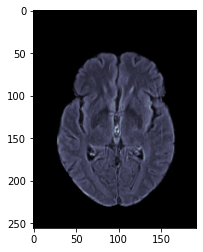

In [19]:
ds = pydicom.dcmread(best_flair_images[0])
print(np.array(ds.pixel_array).sum())
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

6252458


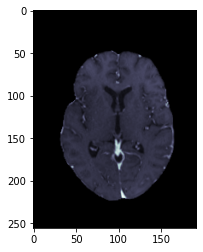

In [20]:
ds = pydicom.dcmread(best_t1wce_images[0])
print(np.array(ds.pixel_array).sum())
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

5276122


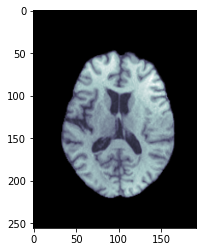

In [21]:
ds = pydicom.dcmread(best_t1w_images[0])
print(np.array(ds.pixel_array).sum())
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

11966276


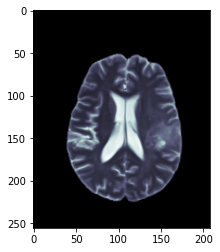

In [22]:
ds = pydicom.dcmread(best_t2w_images[0])
print(np.array(ds.pixel_array).sum())
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)

In [23]:
print(files_num[0])

379


In [24]:
train_labels_ds[train_labels_ds['BraTS21ID']==378]

,BraTS21ID,MGMT_value
258,378,0


66379613


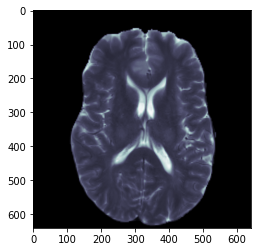

In [25]:
ds = pydicom.dcmread(best_t2w_images[1])
print(np.array(ds.pixel_array).sum())
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)

In [26]:
files_num[1]

805

In [27]:
train_labels_ds[train_labels_ds['BraTS21ID']==408]

,BraTS21ID,MGMT_value
281,408,1
